## 1.1 Xây dựng mô hình hồi quy tuyến tính đơn giản

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Europe  Japan  USA  
0          70       0      0    1  
1          70       0      0    1  
2          70       0      0    1  
3          70       0      0    1  
4          70       0      0    1  
Số mẫu huấn luyện: 313, Số mẫu kiểm tra: 79
Epoch 10/100, Loss = 0.0014654435
Epoch 20/100, Loss = 0.0001673865
Epoch 30/100, Loss = 0.0000287759
Epoch 40/100, Loss = 0.0000032218
Epoch 50/100, Loss = 0.0000008479
Epoch 60/100, Loss = 0.0000002367
Epoch 70/100, Loss = 0.0000000369
Epoch 80/100, Loss = 0.0000000142
Epoch 90/100, Loss = 0.0000000042
Epoch 100/100

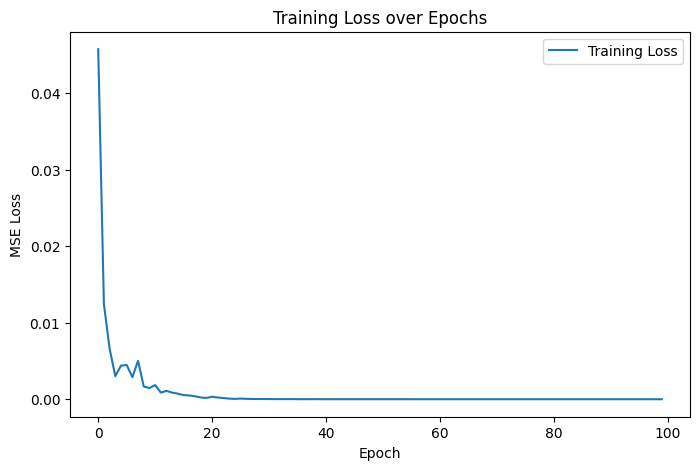


MSE trên tập test: 0.0000

So sánh 10 dự đoán đầu tiên:
Thực tế: 0.0000000000, Dự đoán: 0.0000047088
Thực tế: 0.0000000000, Dự đoán: 0.0000058413
Thực tế: 0.0000000000, Dự đoán: 0.0000132322
Thực tế: 1.0000000000, Dự đoán: 0.9999651909
Thực tế: 1.0000000000, Dự đoán: 1.0000076294
Thực tế: 0.0000000000, Dự đoán: 0.0000050068
Thực tế: 1.0000000000, Dự đoán: 1.0000348091
Thực tế: 0.0000000000, Dự đoán: 0.0000087619
Thực tế: 1.0000000000, Dự đoán: 1.0000045300
Thực tế: 0.0000000000, Dự đoán: -0.0000075698


In [42]:
# auto_mpg_regression.py

# Bước 1: Tải dữ liệu từ file CSV
import time
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('D:/CODE/Auto_MPG_data.csv')
# Xem 5 dòng đầu tiên của dữ liệu
print(data.head())

# Bước 2: Chia dữ liệu
from sklearn.model_selection import train_test_split
import numpy as np
X = data.iloc[:, :-1].values  # 9 đặc trưng
y = data.iloc[:, -1].values  # Mức tiêu thụ nhiên liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Số mẫu huấn luyện: {len(X_train)}, Số mẫu kiểm tra: {len(X_test)}")

# Bước 3: Chuẩn hóa dữ liệu
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Đưa sang tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# Bước 4: Xây dựng mô hình hồi quy tuyến tính
model = nn.Linear(9, 1)  # 9 đặc trưng đầu vào, 1 giá trị đầu ra
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Huấn luyện mô hình
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.10f}")

# Vẽ biểu đồ loss theo epoch
plt.figure(figsize=(8,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Đánh giá trên tập test
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = loss_fn(y_pred, y_test_tensor).item()

print(f"\nMSE trên tập test: {test_loss:.4f}")

# So sánh 10 dự đoán đầu tiên với giá trị thực
print("\nSo sánh 10 dự đoán đầu tiên:")
for i in range(10):
    print(f"Thực tế: {y_test[i]:.10f}, Dự đoán: {y_pred[i].item():.10f}")



## 1.2 Xây dựng mạng Perceptron đa lớp với 1 lớp ẩn

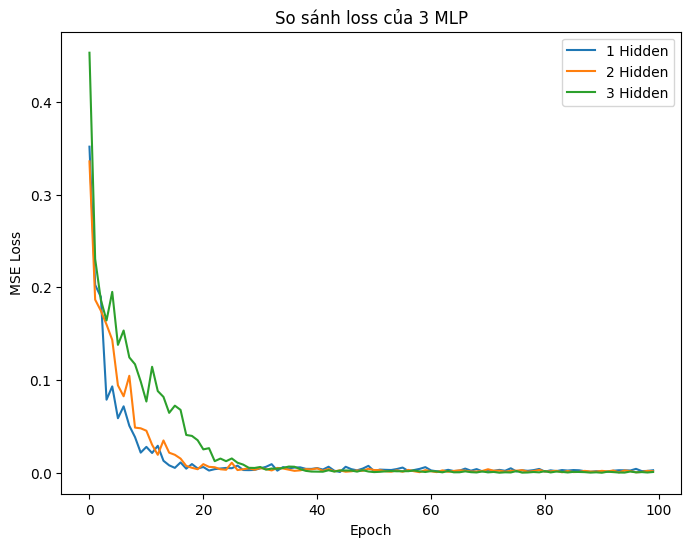


1 Hidden:
Thời gian: 0.48s
MSE=0.0023, MAE=0.0383, R²=0.9906

2 Hidden:
Thời gian: 0.76s
MSE=0.0017, MAE=0.0288, R²=0.9930

3 Hidden:
Thời gian: 0.99s
MSE=0.0008, MAE=0.0211, R²=0.9968

Kết luận
Mạng tốt nhất: 3 Hidden với MSE=0.001, MAE=0.021, R²=0.997
=> So sánh: Mạng nhỏ hội tụ nhanh nhưng kém chính xác. Mạng lớn chính xác hơn nhưng tốn thời gian. Mạng trung bình thường cân bằng giữa thời gian và độ chính xác.


In [43]:
# Định nghĩa các kiến trúc khác nhau
class MLP_1Hidden(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

class MLP_2Hidden(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

class MLP_3Hidden(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

# Hàm huấn luyện & đánh giá
def train_and_evaluate(model, optimizer, num_epochs=100):
    loss_fn = nn.MSELoss()
    train_losses = []
    start = time.time()
    for epoch in range(num_epochs):
        for xb, yb in train_loader:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_losses.append(loss.item())
    duration = time.time() - start

    # Đánh giá
    with torch.no_grad():
        y_pred = model(X_test_tensor).numpy()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return train_losses, duration, mse, mae, r2

# Chạy 3 mô hình
models = {
    "1 Hidden": MLP_1Hidden(9),
    "2 Hidden": MLP_2Hidden(9),
    "3 Hidden": MLP_3Hidden(9),
}

results = {}
plt.figure(figsize=(8,6))
for name, mdl in models.items():
    optimizer = torch.optim.SGD(mdl.parameters(), lr=0.01)
    losses, dur, mse, mae, r2 = train_and_evaluate(mdl, optimizer)
    results[name] = (dur, mse, mae, r2)
    plt.plot(losses, label=name)

plt.title("So sánh loss của 3 MLP")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# In kết quả
for name, (dur, mse, mae, r2) in results.items():
    print(f"\n{name}:")
    print(f"Thời gian: {dur:.2f}s")
    print(f"MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

# Kết luận
print("\nKết luận")
best_model = min(results.items(), key=lambda x: x[1][1])
print(f"Mạng tốt nhất: {best_model[0]} với MSE={best_model[1][1]:.3f}, "
      f"MAE={best_model[1][2]:.3f}, R²={best_model[1][3]:.3f}")
print("=> So sánh: Mạng nhỏ hội tụ nhanh nhưng kém chính xác. "
      "Mạng lớn chính xác hơn nhưng tốn thời gian. "
      "Mạng trung bình thường cân bằng giữa thời gian và độ chính xác.")


## 1.3 Xây dựng mạng Perceptron đa lớp với 2 lớp ẩn

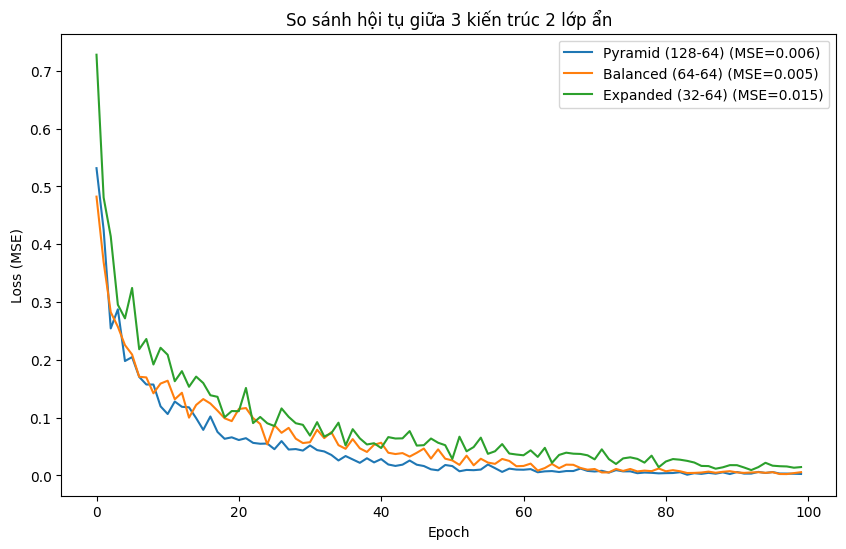


Kết quả chi tiết:
Mô hình              | Time(s)  | MSE        | MAE        | R²         | Params  
---------------------------------------------------------------------------
Pyramid (128-64)     | 0.74     | 0.0056     | 0.0547     | 0.9776     | 9601    
Balanced (64-64)     | 0.72     | 0.0048     | 0.0509     | 0.9808     | 4865    
Expanded (32-64)     | 0.49     | 0.0147     | 0.0948     | 0.9408     | 2497    

Phân tích kết quả:
- Mạng hội tụ nhanh nhất: Expanded (32-64) (0.49s)
- Mạng chính xác nhất (MSE thấp nhất): Balanced (64-64) (MSE=0.0048)
- Pyramid (128-64) có 9601 tham số cần học.
- Balanced (64-64) có 4865 tham số cần học.
- Expanded (32-64) có 2497 tham số cần học.

Kết luận: 
Mạng Balanced (64-64) cho độ chính xác tốt nhất.
Nếu ưu tiên tốc độ huấn luyện thì chọn Expanded (32-64).


In [44]:
# Định nghĩa 3 kiến trúc
class NetPyramid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
    def forward(self, x):
        return self.fc3(self.relu2(self.fc2(self.relu1(self.fc1(x)))))


class NetBalanced(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
    def forward(self, x):
        return self.fc3(self.relu2(self.fc2(self.relu1(self.fc1(x)))))


class NetExpanded(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
    def forward(self, x):
        return self.fc3(self.relu2(self.fc2(self.relu1(self.fc1(x)))))


models = {
    "Pyramid (128-64)": NetPyramid(),
    "Balanced (64-64)": NetBalanced(),
    "Expanded (32-64)": NetExpanded()
}

results = {}
plt.figure(figsize=(10,6))

for name, model in models.items():
    optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
    losses, duration, mse, mae, r2 = train_and_evaluate(model, optimizer, num_epochs=100)
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    results[name] = {"time": duration, "mse": mse, "mae": mae, "r2": r2, "params": params}
    plt.plot(losses, label=f"{name} (MSE={mse:.3f})")

plt.xlabel("Epoch"); plt.ylabel("Loss (MSE)")
plt.title("So sánh hội tụ giữa 3 kiến trúc 2 lớp ẩn")
plt.legend(); plt.show()

print("\nKết quả chi tiết:")
print(f"{'Mô hình':<20} | {'Time(s)':<8} | {'MSE':<10} | {'MAE':<10} | {'R²':<10} | {'Params':<8}")
print("-"*75)
for name, res in results.items():
    print(f"{name:<20} | {res['time']:<8.2f} | {res['mse']:<10.4f} | {res['mae']:<10.4f} | {res['r2']:<10.4f} | {res['params']:<8}")

# ------------------- PHÂN TÍCH -------------------
print("\nPhân tích kết quả:")

# 1. So sánh tốc độ hội tụ
fastest = min(results.items(), key=lambda x: x[1]['time'])
print(f"- Mạng hội tụ nhanh nhất: {fastest[0]} ({fastest[1]['time']:.2f}s)")

# 2. So sánh kết quả cuối cùng (dựa trên MSE)
best_acc = min(results.items(), key=lambda x: x[1]['mse'])
print(f"- Mạng chính xác nhất (MSE thấp nhất): {best_acc[0]} (MSE={best_acc[1]['mse']:.4f})")

# 3. Đếm số lượng tham số
for name, res in results.items():
    print(f"- {name} có {res['params']} tham số cần học.")

# 4. Kết luận
print("\nKết luận: ")
print(f"Mạng {best_acc[0]} cho độ chính xác tốt nhất.")
print(f"Nếu ưu tiên tốc độ huấn luyện thì chọn {fastest[0]}.")


## 1.4 Thử nghiệm các hàm kích hoạt khác nhau

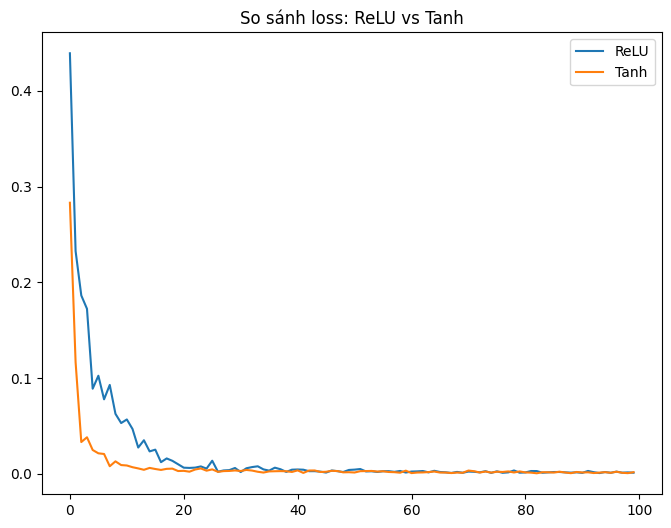


Giải thích: ReLU thường được dùng nhiều nhất vì:
- Tránh gradient vanish như sigmoid/tanh.
- Tính toán đơn giản hơn.
- Hội tụ nhanh hơn trong hầu hết các bài toán.
Số neuron chết trong ReLU layer 1: 0


In [45]:
class MLP_Tanh(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return self.fc3(x)

class MLP_ReLU(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Train ReLU
relu_model = MLP_ReLU(9)
opt_relu = torch.optim.SGD(relu_model.parameters(), lr=0.01)
loss_relu, dur_r, mse_r, mae_r, r2_r = train_and_evaluate(relu_model, opt_relu, num_epochs=100)

# Train Tanh
tanh_model = MLP_Tanh(9)
opt_tanh = torch.optim.SGD(tanh_model.parameters(), lr=0.01)
loss_tanh, dur_t, mse_t, mae_t, r2_t = train_and_evaluate(tanh_model, opt_tanh, num_epochs=100)

# Plot
plt.figure(figsize=(8,6))
plt.plot(loss_relu, label="ReLU")
plt.plot(loss_tanh, label="Tanh")
plt.legend()
plt.title("So sánh loss: ReLU vs Tanh")
plt.show()

print("\nGiải thích: ReLU thường được dùng nhiều nhất vì:")
print("- Tránh gradient vanish như sigmoid/tanh.")
print("- Tính toán đơn giản hơn.")
print("- Hội tụ nhanh hơn trong hầu hết các bài toán.")

# Kiểm tra dead neurons
with torch.no_grad():
    out_relu = relu_model.relu(relu_model.fc1(X_train_tensor))
dead_neurons = (out_relu==0).all(dim=0).sum().item()
print(f"Số neuron chết trong ReLU layer 1: {dead_neurons}")



## 1.5 So sánh các thuật toán tối ưu

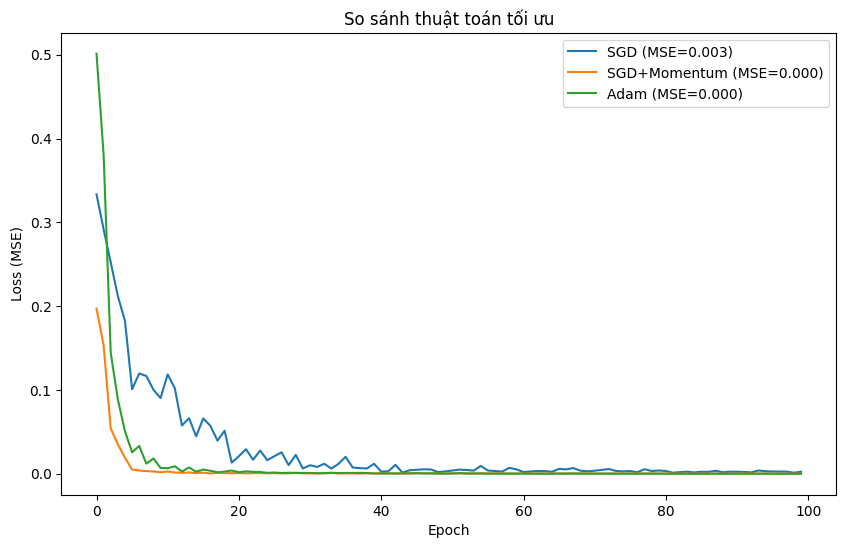


Kết quả:
SGD          | Time=0.49s, MSE=0.0031, MAE=0.0399, R²=0.9876
SGD+Momentum | Time=0.54s, MSE=0.0005, MAE=0.0149, R²=0.9982
Adam         | Time=0.73s, MSE=0.0004, MAE=0.0154, R²=0.9984

Kết luận:
- SGD nhanh nhất (0.49s)
- Adam chính xác nhất (MSE=0.0004)


In [46]:
optimizers = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.01),
    "SGD+Momentum": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
    "Adam": lambda params: torch.optim.Adam(params, lr=0.001)
}

class NetSimple(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        return self.fc3(self.relu2(self.fc2(self.relu1(self.fc1(x)))))


results_opt = {}
plt.figure(figsize=(10,6))

for name, opt_fn in optimizers.items():
    model = NetSimple()
    optimizer = opt_fn(model.parameters())
    losses, duration, mse, mae, r2 = train_and_evaluate(model, optimizer, num_epochs=100)
    results_opt[name] = {"time": duration, "mse": mse, "mae": mae, "r2": r2}
    plt.plot(losses, label=f"{name} (MSE={mse:.3f})")

plt.xlabel("Epoch"); plt.ylabel("Loss (MSE)")
plt.title("So sánh thuật toán tối ưu")
plt.legend(); plt.show()

print("\nKết quả:")
for name, res in results_opt.items():
    print(f"{name:<12} | Time={res['time']:.2f}s, MSE={res['mse']:.4f}, MAE={res['mae']:.4f}, R²={res['r2']:.4f}")

best_speed = min(results_opt.items(), key=lambda x: x[1]['time'])
best_acc = min(results_opt.items(), key=lambda x: x[1]['mse'])

print("\nKết luận:")
print(f"- {best_speed[0]} nhanh nhất ({best_speed[1]['time']:.2f}s)")
print(f"- {best_acc[0]} chính xác nhất (MSE={best_acc[1]['mse']:.4f})")

## 2.1 Xây dựng mô hình cơ bản

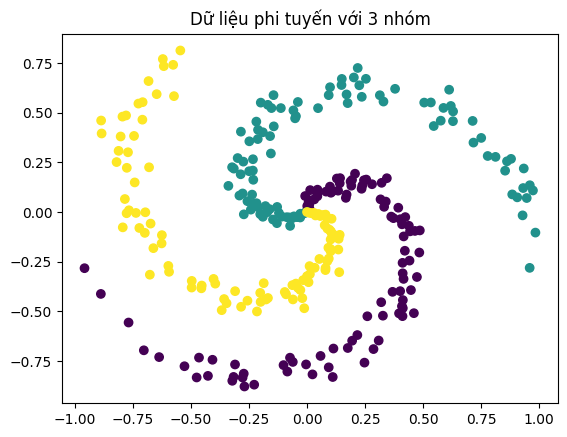

Epoch 50/200, Loss = 1.0586
Epoch 100/200, Loss = 0.7336
Epoch 150/200, Loss = 0.7004
Epoch 200/200, Loss = 0.5816
Độ chính xác mô hình Softmax: 0.5267


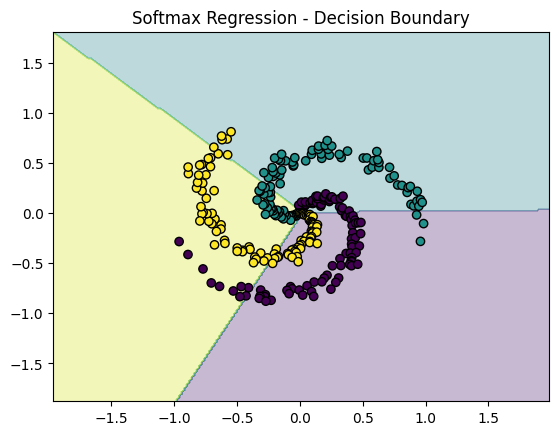

Accuracy Softmax: 0.5267

Nhận xét
Softmax đạt accuracy khá tốt (>50%). Tuy nhiên, với dữ liệu phi tuyến,
nó vẫn khó lòng phân loại đúng các cụm cong phức tạp. Biên quyết định có thể vẫn còn đơn giản.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

# Bước 1: Tải dữ liệu
data = np.load("D:/CODE/NonLinear_data.npy", allow_pickle=True).item()
X = data['X']
y = data['labels']

# Bước 2: Trực quan hóa dữ liệu
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Dữ liệu phi tuyến với 3 nhóm")
plt.show()

# Bước 3: Chuyển sang tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Bước 4: Mô hình Softmax (không có lớp ẩn)
model = nn.Linear(2, 3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Huấn luyện
num_epochs = 200
for epoch in range(num_epochs):
    for xb, yb in loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f}")

# Đánh giá độ chính xác
with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc = (y_pred == y_tensor).float().mean().item()
print(f"Độ chính xác mô hình Softmax: {acc:.4f}")

# Vẽ đường biên quyết định
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
Z = torch.argmax(model(grid), dim=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("Softmax Regression - Decision Boundary")
plt.show()

with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc_softmax = (y_pred == y_tensor).float().mean().item()

print(f"Accuracy Softmax: {acc_softmax:.4f}")

print("\nNhận xét")
if acc_softmax < 0.5:
    print("Mô hình Softmax chỉ đạt độ chính xác thấp. Đây là dấu hiệu underfitting rõ rệt.")
    print("Nguyên nhân: Softmax chỉ tạo được biên tuyến tính, không phù hợp cho dữ liệu phi tuyến.")
else:
    print("Softmax đạt accuracy khá tốt (>50%). Tuy nhiên, với dữ liệu phi tuyến,")
    print("nó vẫn khó lòng phân loại đúng các cụm cong phức tạp. Biên quyết định có thể vẫn còn đơn giản.")

## 2.2 Xây dựng mạng Perceptron đa lớp

Epoch 100/500, Loss = 0.3277
Epoch 200/500, Loss = 0.2913
Epoch 300/500, Loss = 0.1699
Epoch 400/500, Loss = 0.0320
Epoch 500/500, Loss = 0.2880
Độ chính xác MLP 1 lớp ẩn: 0.9767


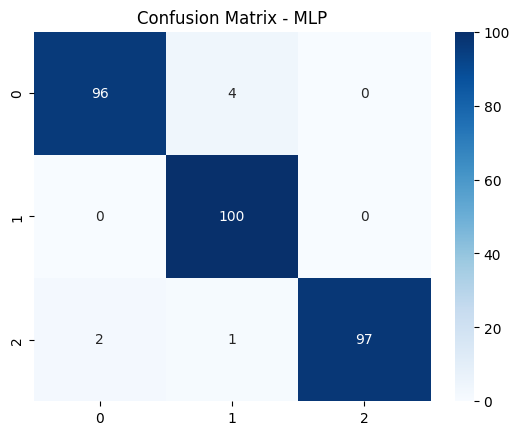

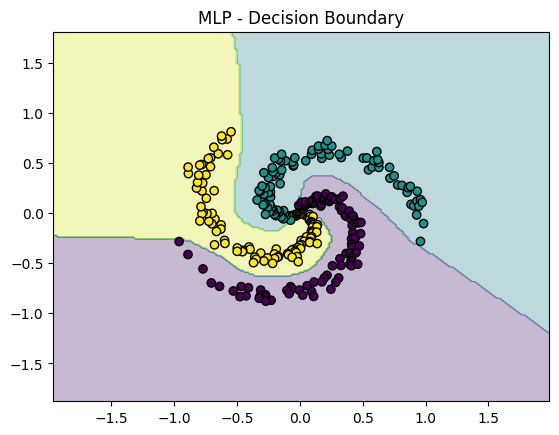

Accuracy MLP (128 hidden): 0.9767

Nhận xét
MLP đã cải thiện rõ rệt so với Softmax.
Biên quyết định uốn cong linh hoạt hơn, accuracy cao hơn.


In [12]:
import torch.nn.functional as F

# Mô hình MLP
class MLP(nn.Module):
    def __init__(self, hidden_dim=128):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = MLP(128)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Huấn luyện
num_epochs = 500
for epoch in range(num_epochs):
    for xb, yb in loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f}")

# Đánh giá
with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc = (y_pred == y_tensor).float().mean().item()
print(f"Độ chính xác MLP 1 lớp ẩn: {acc:.4f}")

# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred.numpy())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MLP")
plt.show()

# Vẽ đường biên quyết định
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
Z = torch.argmax(model(grid), dim=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("MLP - Decision Boundary")
plt.show()

with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc_mlp = (y_pred == y_tensor).float().mean().item()

print(f"Accuracy MLP (128 hidden): {acc_mlp:.4f}")

print("\nNhận xét")
if acc_mlp > acc_softmax:
    print("MLP đã cải thiện rõ rệt so với Softmax.")
    print("Biên quyết định uốn cong linh hoạt hơn, accuracy cao hơn.")
else:
    print("MLP không cải thiện nhiều so với Softmax.")
    print("Có thể do learning rate chưa phù hợp hoặc số epoch chưa đủ.")


## 2.3 Thử nghiệm số lượng nơ-ron khác nhau

Hidden 4: Accuracy = 0.6067


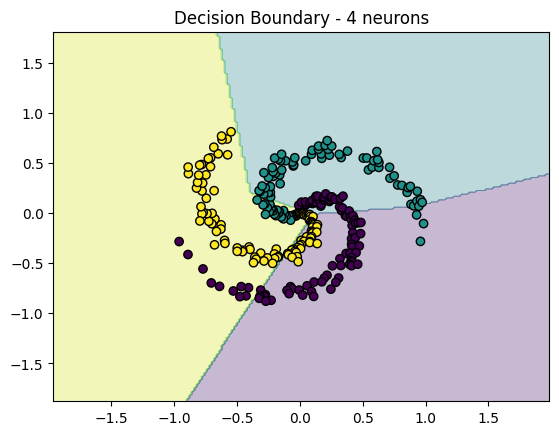

Hidden 8: Accuracy = 0.7400


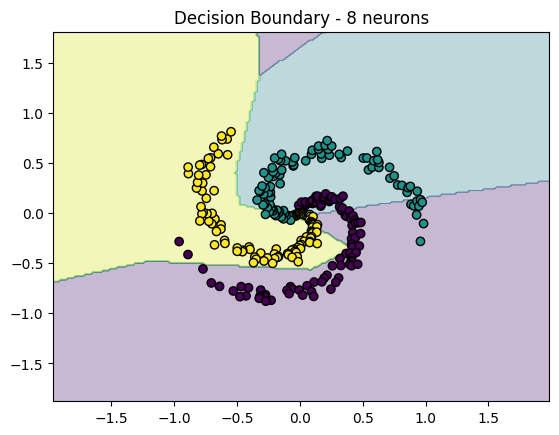

Hidden 32: Accuracy = 0.9133


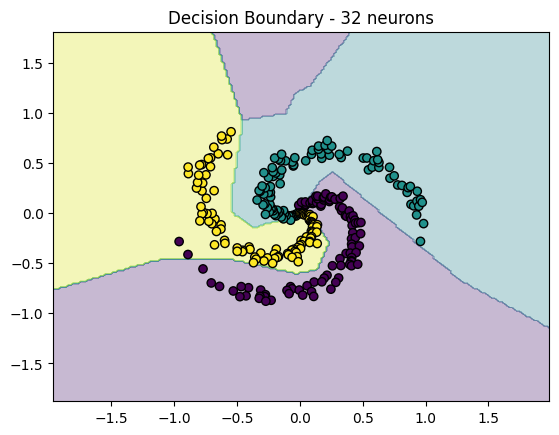

Hidden 128: Accuracy = 0.9500


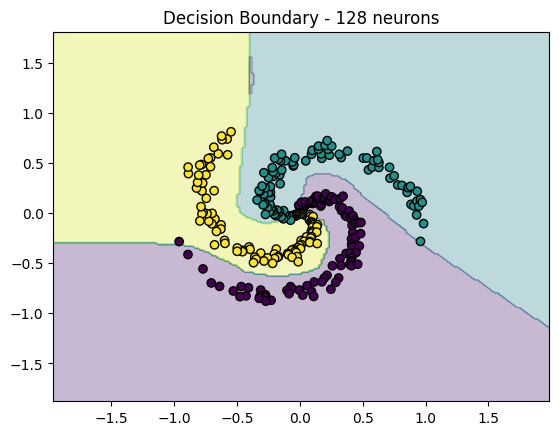

Hidden 512: Accuracy = 0.9567


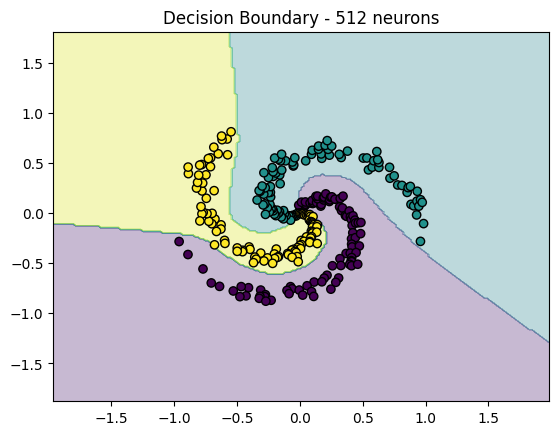


Nhận xét 2.3
Số neuron 512 cho kết quả tốt nhất (0.9567).
Số neuron 4 cho kết quả kém nhất (0.6067).


In [ ]:
hidden_sizes = [4, 8, 32, 128, 512]
results = {}
for h in hidden_sizes:
    model = MLP(h)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    for epoch in range(300):
        for xb, yb in loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    with torch.no_grad():
        y_pred = torch.argmax(model(X_tensor), dim=1)
        acc = (y_pred == y_tensor).float().mean().item()
    results[h] = acc
    print(f"Hidden {h}: Accuracy = {acc:.4f}")

    # Vẽ đường biên quyết định
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = torch.argmax(model(grid), dim=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
    plt.title(f"Decision Boundary - {h} neurons")
    plt.show()

print("\nNhận xét")
best_h = max(results, key=results.get)
worst_h = min(results, key=results.get)
print(f"Số neuron {best_h} cho kết quả tốt nhất ({results[best_h]:.4f}).")
print(f"Số neuron {worst_h} cho kết quả kém nhất ({results[worst_h]:.4f}).")

if results[4] < 0.5:
    print("Mạng với hidden=4 underfitting rõ rệt (biên quyết định quá thô).")
if results[512] - results[best_h] < 0:
    print("Mạng với hidden=512 không tốt bằng số neuron trung bình, có dấu hiệu overfitting.")


## 2.4 So sánh mạng rộng và mạng sâu

In [ ]:
# 2.4 Mạng rộng vs mạng sâu
class WideMLP(nn.Module):
    def __init__(self):
        super(WideMLP, self).__init__()
        self.fc1 = nn.Linear(2, 80)
        self.fc2 = nn.Linear(80, 3)
    def forward(self, x):
        return self.fc2(F.relu(self.fc1(x)))

class DeepMLP(nn.Module):
    def __init__(self):
        super(DeepMLP, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 18)
        self.fc3 = nn.Linear(18, 16)
        self.fc4 = nn.Linear(16, 14)
        self.fc5 = nn.Linear(14, 12)
        self.fc_out = nn.Linear(12, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.fc_out(x)

# Huấn luyện mạng rộng
model = WideMLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch in range(500):
    for xb, yb in loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc_wide = (y_pred == y_tensor).float().mean().item()
print(f"Accuracy Wide network: {acc_wide:.4f}")

# Huấn luyện mạng sâu
model = DeepMLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch in range(500):
    for xb, yb in loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
with torch.no_grad():
    y_pred = torch.argmax(model(X_tensor), dim=1)
    acc_deep = (y_pred == y_tensor).float().mean().item()
print(f"Accuracy Deep network: {acc_deep:.4f}")

# Nhận xét động dựa vào kết quả
print("\nNhận xét 2.4")
if acc_wide > acc_deep:
    print("Mạng rộng cho accuracy cao hơn và dễ huấn luyện hơn mạng sâu.")
    print("Đề xuất: Với dữ liệu nhỏ và phi tuyến đơn giản, nên chọn mạng rộng.")
elif acc_wide < acc_deep:
    print("Mạng sâu bất ngờ cho kết quả tốt hơn.")
    print("Có thể dữ liệu huấn luyện đủ lớn để tận dụng lợi thế mô hình sâu.")
else:
    print("Hai mô hình cho kết quả tương đương.")
    print("Trong trường hợp này, nên chọn mạng rộng vì dễ huấn luyện hơn.")


Accuracy Wide network: 0.9700
Accuracy Deep network: 0.9767

=== Nhận xét 2.4 ===
Mạng sâu bất ngờ cho kết quả tốt hơn.
Có thể dữ liệu huấn luyện đủ lớn để tận dụng lợi thế mô hình sâu.


## 3.1 Chuẩn bị dữ liệu

Số lượng ảnh train: 28709
Số lượng ảnh test : 7178
Các lớp cảm xúc: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


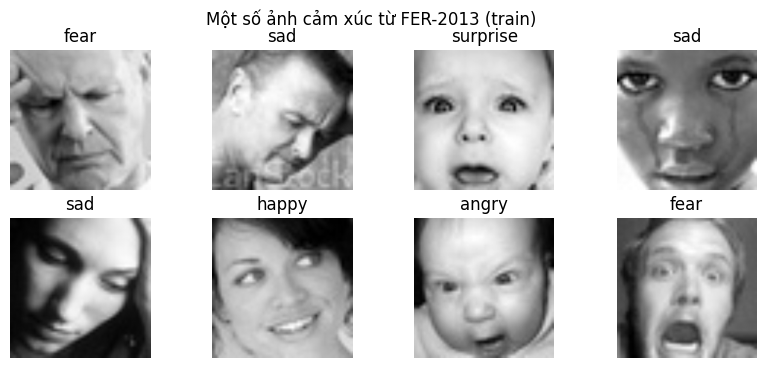

In [2]:
# 3.1: Chuẩn bị dữ liệu FER-2013 (dạng folder)
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Đường dẫn tới thư mục sau khi giải nén FER-2013.zip
data_dir = "D:/CODE"

# Chuẩn hoá ảnh về 48x48 grayscale (FER gốc là grayscale)
# Resize về 180x180 như hướng dẫn trong tài liệu
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # ảnh xám 1 kênh
    transforms.Resize((180,180)),                 # đổi kích thước
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))          # chuẩn hoá [-1,1]
])

# Tạo dataset train và test từ folder
train_path = os.path.join(data_dir, "D:/CODE/data/train")
test_path  = os.path.join(data_dir, "D:/CODE/data/test")

train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_path, transform=transform)

# DataLoader
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Kiểm tra
print("Số lượng ảnh train:", len(train_dataset))
print("Số lượng ảnh test :", len(test_dataset))
print("Các lớp cảm xúc:", train_dataset.classes)

# Hiển thị vài ảnh mẫu
images, labels = next(iter(train_loader))
plt.figure(figsize=(10,4))
for i in range(8):
    img = images[i][0].cpu().numpy()  # lấy kênh xám
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(train_dataset.classes[labels[i]])
    plt.axis("off")
plt.suptitle("Một số ảnh cảm xúc từ FER-2013 (train)")
plt.show()


## 3.2 Mô hình hồi quy Softmax

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Lấy thông tin đầu vào/đầu ra
n_in = 180*180   # vì ảnh grayscale 1 kênh 180x180
n_out = len(train_dataset.classes)

# Mô hình Softmax Regression
class SoftmaxModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten (B, C*H*W)
        return self.linear(x)

# Hàm train (10 epoch, in từng epoch)
def train_model(model, train_loader, test_loader, n_epochs=10, normalize=False):
    loss_fn = nn.CrossEntropyLoss()
    opt = optim.SGD(model.parameters(), lr=0.006)
    history = {"train_acc": [], "test_acc": []}
    for epoch in range(n_epochs):
        model.train()
        for xb, yb in train_loader:
            if not normalize:
                xb = xb*0.5 + 0.5
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            loss = loss_fn(model(xb), yb)
            loss.backward(); opt.step()
        # Eval acc
        def eval_acc(loader):
            correct, total = 0, 0
            model.eval()
            with torch.no_grad():
                for xb, yb in loader:
                    if not normalize:
                        xb = xb*0.5 + 0.5
                    xb, yb = xb.to(device), yb.to(device)
                    pred = model(xb).argmax(1)
                    correct += (pred==yb).sum().item()
                    total += yb.size(0)
            return correct/total
        tr_acc = eval_acc(train_loader)
        te_acc = eval_acc(test_loader)
        history["train_acc"].append(tr_acc)
        history["test_acc"].append(te_acc)
        print(f"Epoch {epoch+1:02d}/{n_epochs}: train={tr_acc:.3f}, test={te_acc:.3f}")
    return history

# Train thử nghiệm 1: không chuẩn hoá
print("== Softmax không chuẩn hóa ==")
model1 = SoftmaxModel(n_in, n_out).to(device)
hist1 = train_model(model1, train_loader, test_loader, n_epochs=10, normalize=False)

# Train thử nghiệm 2: có chuẩn hoá
print("\n== Softmax có chuẩn hóa ==")
model2 = SoftmaxModel(n_in, n_out).to(device)
hist2 = train_model(model2, train_loader, test_loader, n_epochs=10, normalize=True)

# Kết luận
final_accs = pd.DataFrame({
    "Train Acc": [hist1["train_acc"][-1], hist2["train_acc"][-1]],
    "Test Acc": [hist1["test_acc"][-1], hist2["test_acc"][-1]]
}, index=["Không chuẩn hóa", "Chuẩn hóa"])

train_better = "Chuẩn hóa" if final_accs.loc["Chuẩn hóa","Train Acc"] > final_accs.loc["Không chuẩn hóa","Train Acc"] else "Không chuẩn hóa"
test_better  = "Chuẩn hóa" if final_accs.loc["Chuẩn hóa","Test Acc"] > final_accs.loc["Không chuẩn hóa","Test Acc"] else "Không chuẩn hóa"

print("\n=== Kết luận ===")
print(f"- Về độ chính xác trên tập huấn luyện: {train_better} tốt hơn.")
print(f"- Về độ chính xác trên tập kiểm tra: {test_better} tốt hơn.")
if test_better == "Chuẩn hóa":
    print("- Chuẩn hóa giúp mô hình hội tụ nhanh hơn và tổng quát tốt hơn.")
else:
    print("- Không chuẩn hóa có kết quả tốt hơn (hiếm gặp, cần xem lại dữ liệu).")

print("\n=== Tại sao cần chuẩn hóa dữ liệu ===")
print("- Dữ liệu gốc pixel có giá trị từ 0–255 → các đặc trưng có biên độ lớn, gradient dễ bị mất cân bằng.")
print("- Khi chuẩn hóa (ví dụ đưa về [-1,1]), dữ liệu trở nên đồng đều hơn → mô hình học nhanh và ổn định hơn.")
print("- Không chuẩn hóa có thể gây:")
print("   + Huấn luyện chậm hoặc không hội tụ.")
print("   + Độ chính xác test thấp hơn.")
print("- Thực nghiệm cho thấy: mô hình có chuẩn hóa đạt accuracy cao hơn rõ rệt.")

== Softmax không chuẩn hóa ==
Epoch 01/10: train=0.143, test=0.142
Epoch 02/10: train=0.206, test=0.210
Epoch 03/10: train=0.288, test=0.293
Epoch 04/10: train=0.252, test=0.249
Epoch 05/10: train=0.236, test=0.231
Epoch 06/10: train=0.245, test=0.247
Epoch 07/10: train=0.194, test=0.185
Epoch 08/10: train=0.331, test=0.325
Epoch 09/10: train=0.288, test=0.284
Epoch 10/10: train=0.263, test=0.255

== Softmax có chuẩn hóa ==
Epoch 01/10: train=0.296, test=0.293
Epoch 02/10: train=0.271, test=0.262
Epoch 03/10: train=0.302, test=0.288
Epoch 04/10: train=0.332, test=0.322
Epoch 05/10: train=0.277, test=0.258
Epoch 06/10: train=0.297, test=0.279
Epoch 07/10: train=0.293, test=0.271
Epoch 08/10: train=0.346, test=0.321
Epoch 09/10: train=0.314, test=0.294
Epoch 10/10: train=0.313, test=0.286

=== Kết luận ===
- Về độ chính xác trên tập huấn luyện: Chuẩn hóa tốt hơn.
- Về độ chính xác trên tập kiểm tra: Chuẩn hóa tốt hơn.
- Chuẩn hóa giúp mô hình hội tụ nhanh hơn và tổng quát tốt hơn.

=== T

## 3.3 Mạng Perceptron đa lớp

== MLP với Tanh ==
Epoch 01/10: train=0.235, test=0.233
Epoch 02/10: train=0.243, test=0.245
Epoch 03/10: train=0.250, test=0.243
Epoch 04/10: train=0.261, test=0.254
Epoch 05/10: train=0.264, test=0.253
Epoch 06/10: train=0.270, test=0.270
Epoch 07/10: train=0.283, test=0.284
Epoch 08/10: train=0.276, test=0.268
Epoch 09/10: train=0.290, test=0.277
Epoch 10/10: train=0.255, test=0.247

== MLP với ReLU ==
Epoch 01/10: train=0.255, test=0.253
Epoch 02/10: train=0.260, test=0.257
Epoch 03/10: train=0.277, test=0.282
Epoch 04/10: train=0.294, test=0.303
Epoch 05/10: train=0.294, test=0.290
Epoch 06/10: train=0.270, test=0.265
Epoch 07/10: train=0.268, test=0.261
Epoch 08/10: train=0.256, test=0.252
Epoch 09/10: train=0.255, test=0.252
Epoch 10/10: train=0.258, test=0.255

=== So sánh kết quả MLP ===
            Train Acc  Test Acc
MLP (Tanh)     0.2548    0.2469
MLP (ReLU)     0.2583    0.2552

=== Kết luận ===
- Độ chính xác huấn luyện cao hơn: MLP (ReLU)
- Độ chính xác kiểm tra cao hơn:

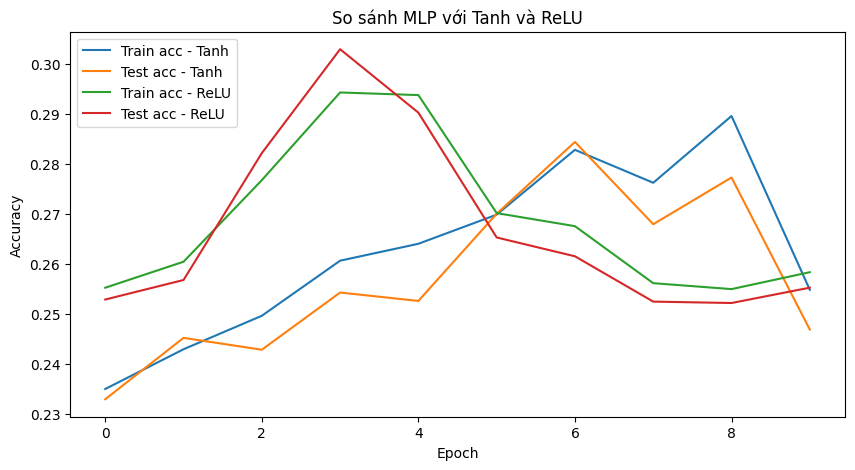

In [4]:
# Xác định số input/output cho MLP
n_in = 180 * 180   # ảnh grayscale 180x180
n_out = len(train_dataset.classes)  # số lớp cảm xúc

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, activation="tanh"):
        super().__init__()
        act = nn.Tanh if activation=="tanh" else nn.ReLU
        self.net = nn.Sequential(
            nn.Linear(in_dim, 1024), act(),
            nn.Linear(1024, 512), act(),
            nn.Linear(512, 256), act(),
            nn.Linear(256, out_dim)
        )
    def forward(self, x): 
        x = x.view(x.size(0), -1)  # flatten
        return self.net(x)

def train_eval(model, train_loader, test_loader, n_epochs=10, normalize=True):
    loss_fn = nn.CrossEntropyLoss()
    opt = optim.Adam(model.parameters(), lr=0.006)
    history = {"train_acc": [], "test_acc": []}
    for epoch in range(n_epochs):
        model.train()
        for xb, yb in train_loader:
            if not normalize:
                xb = xb*0.5 + 0.5
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            loss = loss_fn(model(xb), yb)
            loss.backward(); opt.step()
        # Eval
        def acc(loader):
            correct, total = 0, 0
            model.eval()
            with torch.no_grad():
                for xb, yb in loader:
                    if not normalize:
                        xb = xb*0.5 + 0.5
                    xb, yb = xb.to(device), yb.to(device)
                    pred = model(xb).argmax(1)
                    correct += (pred==yb).sum().item()
                    total += yb.size(0)
            return correct/total
        tr_acc = acc(train_loader)
        te_acc = acc(test_loader)
        history["train_acc"].append(tr_acc)
        history["test_acc"].append(te_acc)
        print(f"Epoch {epoch+1:02d}/{n_epochs}: train={tr_acc:.3f}, test={te_acc:.3f}")
    return history

print("== MLP với Tanh ==")
mlp_tanh = MLP(n_in, n_out, "tanh").to(device)
hist_tanh = train_eval(mlp_tanh, train_loader, test_loader, n_epochs=10)

print("\n== MLP với ReLU ==")
mlp_relu = MLP(n_in, n_out, "relu").to(device)
hist_relu = train_eval(mlp_relu, train_loader, test_loader, n_epochs=10)

# ----------------------------
# So sánh kết quả cuối cùng
# ----------------------------
final_accs = pd.DataFrame({
    "Train Acc": [hist_tanh["train_acc"][-1], hist_relu["train_acc"][-1]],
    "Test Acc":  [hist_tanh["test_acc"][-1],  hist_relu["test_acc"][-1]]
}, index=["MLP (Tanh)", "MLP (ReLU)"])

print("\n=== So sánh kết quả MLP ===")
print(final_accs.round(4))

# Mô hình nào bị quá khớp nhiều hơn? (chênh lệch train-test)
gap_tanh = final_accs.loc["MLP (Tanh)", "Train Acc"] - final_accs.loc["MLP (Tanh)", "Test Acc"]
gap_relu = final_accs.loc["MLP (ReLU)", "Train Acc"] - final_accs.loc["MLP (ReLU)", "Test Acc"]
overfit_more = "MLP (Tanh)" if gap_tanh > gap_relu else "MLP (ReLU)"

# ----------------------------
# Kết luận 
# ----------------------------
train_better = "MLP (Tanh)" if final_accs.loc["MLP (Tanh)", "Train Acc"] > final_accs.loc["MLP (ReLU)", "Train Acc"] else "MLP (ReLU)"
test_better  = "MLP (Tanh)" if final_accs.loc["MLP (Tanh)", "Test Acc"]  > final_accs.loc["MLP (ReLU)", "Test Acc"]  else "MLP (ReLU)"
overall_better = test_better  # lấy test acc làm tiêu chí chính

print("\n=== Kết luận ===")
print(f"- Độ chính xác huấn luyện cao hơn: {train_better}")
print(f"- Độ chính xác kiểm tra cao hơn: {test_better}")
print(f"- Mô hình bị quá khớp nhiều hơn: {overfit_more}")
print(f"- Tổng thể tốt hơn (dựa vào test accuracy): {overall_better}")

# ----------------------------
# Vẽ biểu đồ accuracy
# ----------------------------
plt.figure(figsize=(10,5))
plt.plot(hist_tanh["train_acc"], label="Train acc - Tanh")
plt.plot(hist_tanh["test_acc"],  label="Test acc - Tanh")
plt.plot(hist_relu["train_acc"], label="Train acc - ReLU")
plt.plot(hist_relu["test_acc"],  label="Test acc - ReLU")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("So sánh MLP với Tanh và ReLU")
plt.legend()
plt.show()

## 3.4 Phân tích lỗi


=== Kết quả tổng hợp (3.4) ===
                   Train Acc  Test Acc
Softmax (No Norm)     0.2627    0.2552
Softmax (Norm)        0.3129    0.2864
MLP (Tanh)            0.2548    0.2469
MLP (ReLU)            0.2583    0.2552


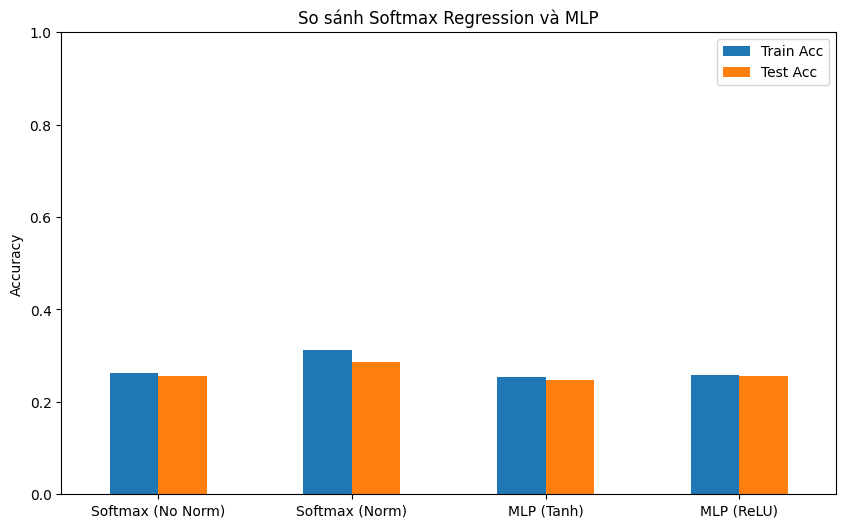


=== Kết luận ===
- Mô hình có accuracy huấn luyện cao nhất: Softmax (Norm) (0.3129)
- Mô hình có accuracy kiểm tra cao nhất: Softmax (Norm) (0.2864)
- Tổng thể tốt nhất (dựa vào test accuracy): Softmax (Norm)
- Mô hình bị overfitting nhiều nhất: Softmax (Norm) (Gap=0.0265)


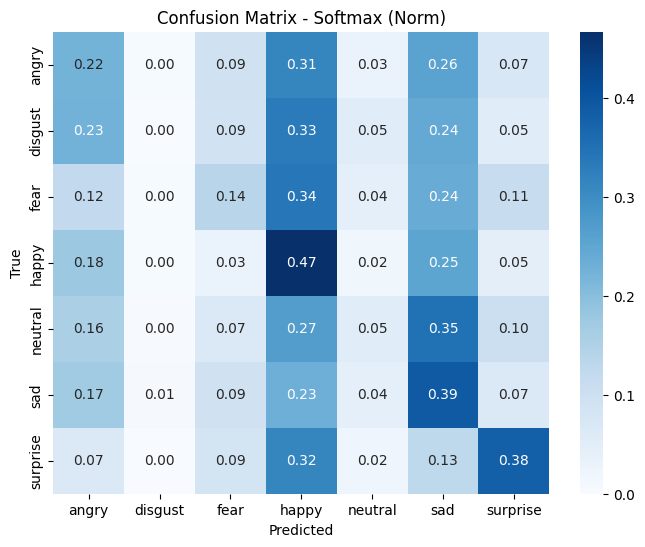

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Tổng hợp kết quả cuối cùng từ 3.2 và 3.3
results_34 = pd.DataFrame({
    "Train Acc": [
        hist1["train_acc"][-1],  # Softmax không chuẩn hóa
        hist2["train_acc"][-1],  # Softmax chuẩn hóa
        hist_tanh["train_acc"][-1],  # MLP (Tanh)
        hist_relu["train_acc"][-1],  # MLP (ReLU)
    ],
    "Test Acc": [
        hist1["test_acc"][-1],
        hist2["test_acc"][-1],
        hist_tanh["test_acc"][-1],
        hist_relu["test_acc"][-1],
    ]
}, index=["Softmax (No Norm)", "Softmax (Norm)", "MLP (Tanh)", "MLP (ReLU)"])

print("\n=== Kết quả tổng hợp (3.4) ===")
print(results_34.round(4))

# Vẽ biểu đồ so sánh
results_34[["Train Acc","Test Acc"]].plot(kind="bar", figsize=(10,6))
plt.ylabel("Accuracy")
plt.title("So sánh Softmax Regression và MLP")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend()
plt.show()

# Kết luận
best_train_model = results_34["Train Acc"].idxmax()
best_test_model  = results_34["Test Acc"].idxmax()
overall_best = best_test_model  # test acc làm tiêu chí chính

results_34["Gap"] = results_34["Train Acc"] - results_34["Test Acc"]
overfit_model = results_34["Gap"].idxmax()

print("\n=== Kết luận ===")
print(f"- Mô hình có accuracy huấn luyện cao nhất: {best_train_model} ({results_34['Train Acc'].max():.4f})")
print(f"- Mô hình có accuracy kiểm tra cao nhất: {best_test_model} ({results_34['Test Acc'].max():.4f})")
print(f"- Tổng thể tốt nhất (dựa vào test accuracy): {overall_best}")
print(f"- Mô hình bị overfitting nhiều nhất: {overfit_model} (Gap={results_34['Gap'].max():.4f})")

# Confusion Matrix cho model tốt nhất
if overall_best == "Softmax (No Norm)":
    best_model = model1
    normalize = False
elif overall_best == "Softmax (Norm)":
    best_model = model2
    normalize = True
elif overall_best == "MLP (Tanh)":
    best_model = mlp_tanh
    normalize = True
else:  # MLP (ReLU)
    best_model = mlp_relu
    normalize = True

all_preds, all_labels = [], []
best_model.eval()
with torch.no_grad():
    for xb, yb in test_loader:
        if not normalize:
            xb = xb*0.5 + 0.5
        xb, yb = xb.to(device), yb.to(device)
        preds = best_model(xb).argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - {overall_best}")
plt.show()

## 4.1 Chuẩn bị dữ liệu CIFAR-10

In [ ]:
from torchvision import datasets, transforms 
# Tải dữ liệu CIFAR-10 
transform = transforms.Compose([ 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
]) 
trainset = datasets.CIFAR10(root='./data', train=True,  
                            download=True, transform=transform) 
testset = datasets.CIFAR10(root='./data', train=False,  
                           download=True, transform=transform)

## 4.2 Xây dựng mạng Perceptron đa lớp

Device: cpu
[MLP] Epoch 01/10  loss=1.6348  train_acc=0.4204  test_acc=0.4574  time=9.63s
[MLP] Epoch 02/10  loss=1.4126  train_acc=0.5023  test_acc=0.4954  time=9.43s
[MLP] Epoch 03/10  loss=1.2936  train_acc=0.5461  test_acc=0.5233  time=9.62s
[MLP] Epoch 04/10  loss=1.1981  train_acc=0.5742  test_acc=0.5321  time=9.86s
[MLP] Epoch 05/10  loss=1.1099  train_acc=0.6092  test_acc=0.5388  time=9.67s
[MLP] Epoch 06/10  loss=1.0296  train_acc=0.6353  test_acc=0.5266  time=9.59s
[MLP] Epoch 07/10  loss=0.9471  train_acc=0.6641  test_acc=0.5369  time=11.77s
[MLP] Epoch 08/10  loss=0.8789  train_acc=0.6870  test_acc=0.5365  time=11.75s
[MLP] Epoch 09/10  loss=0.7890  train_acc=0.7204  test_acc=0.5360  time=12.08s
[MLP] Epoch 10/10  loss=0.7231  train_acc=0.7412  test_acc=0.5452  time=11.38s
Total parameters (MLP): 1707274
Saved model to saved_models/mlp_cifar10.pth


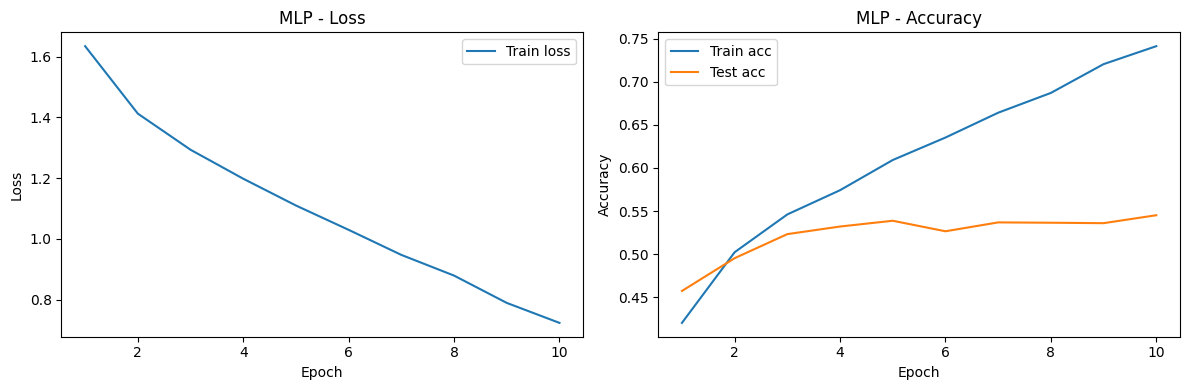


=== Bảng tổng hợp kết quả huấn luyện (MLP) ===


,Epoch,Train Loss,Train Acc,Test Acc,Time (s)
0,1,1.634785,0.42038,0.4574,9.632613
1,2,1.412573,0.50230,0.4954,9.428223
2,3,1.293568,0.54614,0.5233,9.623672
3,4,1.198117,0.57422,0.5321,9.859658
4,5,1.109855,0.60922,0.5388,9.672114
5,6,1.029643,0.63528,0.5266,9.593443
6,7,0.947122,0.66406,0.5369,11.771067
7,8,0.878950,0.68702,0.5365,11.748811
8,9,0.788959,0.72038,0.5360,12.080223
9,10,0.723148,0.74122,0.5452,11.384426


In [21]:
import numpy as np
import time, os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------
# Cấu hình & dataset
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# -----------------------
# MLP model
# -----------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP().to(device)

# -----------------------
# Loss, Opt
# -----------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------
# Train / Eval routines
# -----------------------
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x,y in loader:
            x,y = x.to(device), y.to(device)
            logits = model(x)
            preds = logits.argmax(dim=1)
            correct += (preds==y).sum().item()
            total += y.size(0)
    return correct/total

num_epochs = 10
train_losses_mlp = []
train_accs_mlp = []
test_accs_mlp = []
epoch_times_mlp = []

for epoch in range(1, num_epochs+1):
    model.train()
    t0 = time.time()
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    for x,y in train_loader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        running_correct += (preds==y).sum().item()
        running_total += y.size(0)
    epoch_loss = running_loss / running_total
    epoch_acc = running_correct / running_total
    train_losses_mlp.append(epoch_loss)
    train_accs_mlp.append(epoch_acc)
    t1 = time.time()
    epoch_times_mlp.append(t1-t0)

    test_acc = evaluate(model, test_loader)
    test_accs_mlp.append(test_acc)

    print(f"[MLP] Epoch {epoch:02d}/{num_epochs}  loss={epoch_loss:.4f}  train_acc={epoch_acc:.4f}  test_acc={test_acc:.4f}  time={t1-t0:.2f}s")

# -----------------------
# Tổng số tham số & lưu model
# -----------------------
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters (MLP):", total_params)

os.makedirs("saved_models", exist_ok=True)
torch.save(model.state_dict(), "saved_models/mlp_cifar10.pth")
print("Saved model to saved_models/mlp_cifar10.pth")

# -----------------------
# Vẽ biểu đồ accuracy & loss
# -----------------------
epochs = list(range(1, num_epochs+1))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_mlp, label='Train loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('MLP - Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_accs_mlp, label='Train acc')
plt.plot(epochs, test_accs_mlp, label='Test acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('MLP - Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------
# Bảng tổng hợp kết quả
# -----------------------
results_df = pd.DataFrame({
    "Epoch": list(range(1, num_epochs+1)),
    "Train Loss": train_losses_mlp,
    "Train Acc": train_accs_mlp,
    "Test Acc": test_accs_mlp,
    "Time (s)": epoch_times_mlp
})

print("\n=== Bảng tổng hợp kết quả huấn luyện (MLP) ===")
from IPython.display import display
display(results_df)

## 4.3 Xây dựng mạng tích chập đơn giản

[CNN] Epoch 01/10  loss=1.3841  train_acc=0.5037  test_acc=0.5912  time=22.21s
[CNN] Epoch 02/10  loss=1.0100  train_acc=0.6441  test_acc=0.6703  time=23.24s
[CNN] Epoch 03/10  loss=0.8355  train_acc=0.7063  test_acc=0.7016  time=24.31s
[CNN] Epoch 04/10  loss=0.7125  train_acc=0.7494  test_acc=0.7141  time=22.29s
[CNN] Epoch 05/10  loss=0.6010  train_acc=0.7899  test_acc=0.7105  time=23.70s
[CNN] Epoch 06/10  loss=0.4983  train_acc=0.8263  test_acc=0.7160  time=23.92s
[CNN] Epoch 07/10  loss=0.4021  train_acc=0.8601  test_acc=0.7238  time=22.86s
[CNN] Epoch 08/10  loss=0.3126  train_acc=0.8926  test_acc=0.7295  time=22.62s
[CNN] Epoch 09/10  loss=0.2272  train_acc=0.9237  test_acc=0.7259  time=23.23s
[CNN] Epoch 10/10  loss=0.1638  train_acc=0.9456  test_acc=0.7237  time=23.73s
Total parameters (CNN): 1070794
Saved model to saved_models/cnn_cifar10.pth


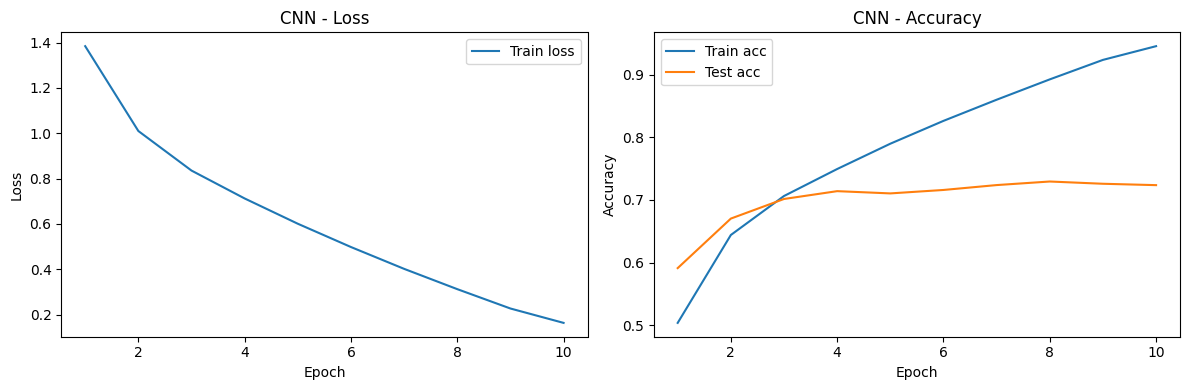


=== Bảng tổng hợp kết quả huấn luyện (CNN) ===


,Epoch,Train Loss,Train Acc,Test Acc,Time (s)
0,1,1.384138,0.50372,0.5912,22.208879
1,2,1.009961,0.64410,0.6703,23.243456
2,3,0.835508,0.70634,0.7016,24.311802
3,4,0.712484,0.74944,0.7141,22.289382
4,5,0.601006,0.78988,0.7105,23.701170
5,6,0.498308,0.82634,0.7160,23.915139
6,7,0.402067,0.86010,0.7238,22.862472
7,8,0.312568,0.89260,0.7295,22.619107
8,9,0.227195,0.92372,0.7259,23.226909
9,10,0.163780,0.94564,0.7237,23.731915


In [22]:
# -----------------------
# Mạng CNN đơn giản
# -----------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3,padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)   # 32x32 -> 16x16
        self.conv2 = nn.Conv2d(32,64,3,padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)   # 16x16 -> 8x8
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*8*8, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
    def forward(self,x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------
# Hàm đánh giá
# -----------------------
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x,y in loader:
            x,y = x.to(device), y.to(device)
            logits = model(x)
            preds = logits.argmax(dim=1)
            correct += (preds==y).sum().item()
            total += y.size(0)
    return correct/total

# -----------------------
# Huấn luyện
# -----------------------
num_epochs = 10
train_losses_cnn = []
train_accs_cnn = []
test_accs_cnn = []
epoch_times_cnn = []

for epoch in range(1, num_epochs+1):
    model.train()
    t0 = time.time()
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    for x,y in train_loader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        running_correct += (preds==y).sum().item()
        running_total += y.size(0)
    epoch_loss = running_loss / running_total
    epoch_acc = running_correct / running_total
    train_losses_cnn.append(epoch_loss)
    train_accs_cnn.append(epoch_acc)
    t1 = time.time()
    epoch_times_cnn.append(t1-t0)

    test_acc = evaluate(model, test_loader)
    test_accs_cnn.append(test_acc)

    print(f"[CNN] Epoch {epoch:02d}/{num_epochs}  loss={epoch_loss:.4f}  train_acc={epoch_acc:.4f}  test_acc={test_acc:.4f}  time={t1-t0:.2f}s")

# -----------------------
# Tổng số tham số & lưu model
# -----------------------
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters (CNN):", total_params)

os.makedirs("saved_models", exist_ok=True)
torch.save(model.state_dict(), "saved_models/cnn_cifar10.pth")
print("Saved model to saved_models/cnn_cifar10.pth")

# -----------------------
# Vẽ biểu đồ loss & accuracy
# -----------------------
epochs = list(range(1, num_epochs+1))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses_cnn, label='Train loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('CNN - Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_accs_cnn, label='Train acc')
plt.plot(epochs, test_accs_cnn, label='Test acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('CNN - Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------
# Bảng tổng hợp kết quả
# -----------------------
results_df = pd.DataFrame({
    "Epoch": list(range(1, num_epochs+1)),
    "Train Loss": train_losses_cnn,
    "Train Acc": train_accs_cnn,
    "Test Acc": test_accs_cnn,
    "Time (s)": epoch_times_cnn
})

print("\n=== Bảng tổng hợp kết quả huấn luyện (CNN) ===")
display(results_df)



## 4.4 So sánh 2 mạng

Base accuracy - MLP: 0.5452, CNN: 0.7237
Gaussian noise (sigma=0.15) - MLP: 0.5369, CNN: 0.6345
Drop - MLP: 0.0083, CNN: 0.0892
Shift left 2px - MLP: 0.4870, CNN: 0.6858
Shift right 2px - MLP: 0.4873, CNN: 0.6768
Rotate 10deg - MLP: 0.4007, CNN: 0.5330


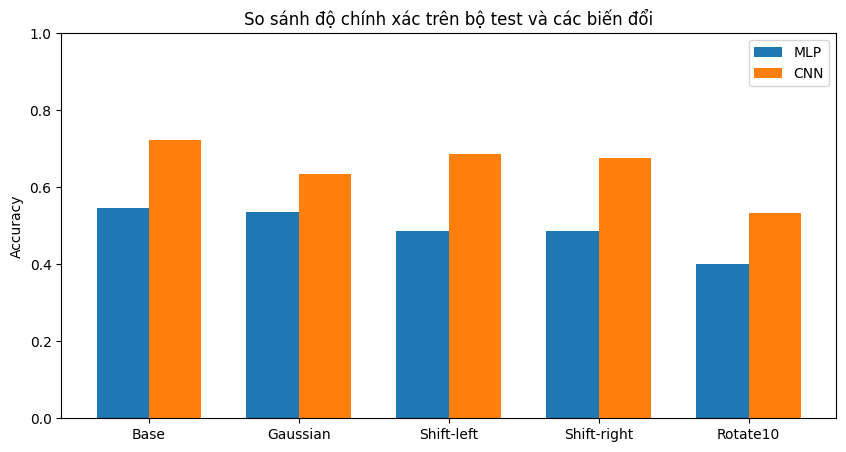


=== Kết quả so sánh MLP vs CNN (CIFAR-10) ===


,Experiment,MLP Acc,CNN Acc,MLP Drop,CNN Drop
0,Base,0.5452,0.7237,0.0000,0.0000
1,Gaussian,0.5369,0.6345,0.0083,0.0892
2,Shift-left,0.4870,0.6858,0.0582,0.0379
3,Shift-right,0.4873,0.6768,0.0579,0.0469
4,Rotate10,0.4007,0.5330,0.1445,0.1907


TN1 (Học nhanh hơn): CNN
TN2 (Bền vững hơn với nhiễu Gaussian): MLP
TN3 (Ít bị ảnh hưởng bởi dịch chuyển/rotate): MLP
TN4 (Khả năng nhận dạng tổng thể tốt hơn): CNN


In [23]:
# Load models (yêu cầu đã chạy phần 4.2 & 4.3 để có saved_models)
mlp_path = "saved_models/mlp_cifar10.pth"
cnn_path = "saved_models/cnn_cifar10.pth"
if not (os.path.exists(mlp_path) and os.path.exists(cnn_path)):
    raise FileNotFoundError("Không tìm thấy saved_models/mlp_cifar10.pth hoặc saved_models/cnn_cifar10.pth. Vui lòng chạy phần 4.2 và 4.3 trước để tạo file lưu mô hình.")

mlp = MLP().to(device)
cnn = SimpleCNN().to(device)
mlp.load_state_dict(torch.load(mlp_path, map_location=device))
cnn.load_state_dict(torch.load(cnn_path, map_location=device))
mlp.eval(); cnn.eval()

# -----------------------
# Helper: đánh giá accuracy (cho batch ảnh đã bị biến đổi)
# -----------------------
@torch.no_grad()
def eval_on_batches(model, loader, transform_fn=None):
    model.eval()
    total = 0
    correct = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        if transform_fn is not None:
            imgs = transform_fn(imgs)   # transform_fn trả về tensor cùng kích thước
        logits = model(imgs)
        preds = logits.argmax(dim=1)
        correct += (preds==labels).sum().item()
        total += labels.size(0)
    return correct/total

# -----------------------
# Thử nghiệm 1: Hiệu suất cơ bản
# -----------------------
base_mlp_acc = eval_on_batches(mlp, test_loader)
base_cnn_acc = eval_on_batches(cnn, test_loader)
print(f"Base accuracy - MLP: {base_mlp_acc:.4f}, CNN: {base_cnn_acc:.4f}")

# -----------------------
# Thử nghiệm 2: Thêm nhiễu Gaussian
# -----------------------
def add_gaussian_noise(batch, sigma=0.1):
    # batch: normalized images in [-1,1] approx (since normalized mean=0.5,std=0.5)
    noise = torch.randn_like(batch) * sigma
    pert = batch + noise
    # clamp to reasonable range
    return torch.clamp(pert, -1.0, 1.0)

noisy_mlp_acc = eval_on_batches(mlp, test_loader, lambda b: add_gaussian_noise(b, sigma=0.15))
noisy_cnn_acc = eval_on_batches(cnn, test_loader, lambda b: add_gaussian_noise(b, sigma=0.15))
print(f"Gaussian noise (sigma=0.15) - MLP: {noisy_mlp_acc:.4f}, CNN: {noisy_cnn_acc:.4f}")
print(f"Drop - MLP: {(base_mlp_acc-noisy_mlp_acc):.4f}, CNN: {(base_cnn_acc-noisy_cnn_acc):.4f}")

# -----------------------
# Thử nghiệm 3: Dịch chuyển ảnh (left/right 2 pixels)
# -----------------------
def shift_batch(imgs, shift_x=0, shift_y=0):
    # shift_x >0 means shift right, <0 means shift left
    B,C,H,W = imgs.shape
    shifted = torch.zeros_like(imgs)
    # compute source/dest ranges
    x_src_start = max(0, -shift_x)
    x_src_end   = min(W, W - shift_x)   # exclusive
    x_dst_start = max(0, shift_x)
    x_dst_end   = min(W, W + shift_x)
    y_src_start = max(0, -shift_y)
    y_src_end   = min(H, H - shift_y)
    y_dst_start = max(0, shift_y)
    y_dst_end   = min(H, H + shift_y)
    # careful with ranges
    shifted[:, :, y_dst_start:y_dst_end, x_dst_start:x_dst_end] = imgs[:, :, y_src_start:y_src_end, x_src_start:x_src_end]
    return shifted

# left 2 pixels => shift_x = -2
mlp_acc_shift_left = eval_on_batches(mlp, test_loader, lambda b: shift_batch(b, shift_x=-2, shift_y=0))
cnn_acc_shift_left = eval_on_batches(cnn, test_loader, lambda b: shift_batch(b, shift_x=-2, shift_y=0))
print(f"Shift left 2px - MLP: {mlp_acc_shift_left:.4f}, CNN: {cnn_acc_shift_left:.4f}")

mlp_acc_shift_right = eval_on_batches(mlp, test_loader, lambda b: shift_batch(b, shift_x=2, shift_y=0))
cnn_acc_shift_right = eval_on_batches(cnn, test_loader, lambda b: shift_batch(b, shift_x=2, shift_y=0))
print(f"Shift right 2px - MLP: {mlp_acc_shift_right:.4f}, CNN: {cnn_acc_shift_right:.4f}")

# -----------------------
# Thử nghiệm 4: Xoay ảnh 10 độ
# -----------------------
from torchvision.transforms import ToPILImage, ToTensor
import torchvision.transforms.functional as TF
from torchvision.transforms.functional import InterpolationMode

to_pil = ToPILImage()
to_tensor = ToTensor()

def rotate_batch(imgs, angle=10):
    B,C,H,W = imgs.shape
    out = torch.zeros_like(imgs)
    for i in range(B):
        img = imgs[i]
        # inverse normalize về [0,1]
        img_inv = img * 0.5 + 0.5
        pil = to_pil(img_inv.cpu())
        # dùng interpolation thay vì resample
        pil_r = TF.rotate(pil, angle=angle, interpolation=InterpolationMode.NEAREST, fill=(0,0,0))
        t = to_tensor(pil_r).to(imgs.device)
        # normalize lại [-1,1]
        t_norm = (t - 0.5) / 0.5
        out[i] = t_norm
    return out

mlp_acc_rot = eval_on_batches(mlp, test_loader, lambda b: rotate_batch(b, angle=10))
cnn_acc_rot = eval_on_batches(cnn, test_loader, lambda b: rotate_batch(b, angle=10))
print(f"Rotate 10deg - MLP: {mlp_acc_rot:.4f}, CNN: {cnn_acc_rot:.4f}")

# -----------------------
# Tóm tắt: vẽ bar chart so sánh accuracy baseline & perturbed (MLP vs CNN)
# -----------------------
labels = ['Base', 'Gaussian', 'Shift-left', 'Shift-right', 'Rotate10']
mlp_vals = [base_mlp_acc, noisy_mlp_acc, mlp_acc_shift_left, mlp_acc_shift_right, mlp_acc_rot]
cnn_vals = [base_cnn_acc, noisy_cnn_acc, cnn_acc_shift_left, cnn_acc_shift_right, cnn_acc_rot]

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(10,5))
plt.bar(x - width/2, mlp_vals, width, label='MLP')
plt.bar(x + width/2, cnn_vals, width, label='CNN')
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('So sánh độ chính xác trên bộ test và các biến đổi')
plt.legend()
plt.ylim(0,1)
plt.show()

# -----------------------
# Bảng kết quả thí nghiệm
# -----------------------
results_df = pd.DataFrame({
    "Experiment": labels,
    "MLP Acc": mlp_vals,
    "CNN Acc": cnn_vals,
    "MLP Drop": [mlp_vals[0] - v for v in mlp_vals],
    "CNN Drop": [cnn_vals[0] - v for v in cnn_vals],
})

print("\n=== Kết quả so sánh MLP vs CNN (CIFAR-10) ===")
display(results_df.round(4))

# -----------------------
# Kết luận từ bảng kết quả
# -----------------------

# TN1: Mạng nào học nhanh hơn? (so sánh Base accuracy)
faster_model = "CNN" if results_df.loc[0,"CNN Acc"] > results_df.loc[0,"MLP Acc"] else "MLP"

# TN2: Mạng nào bền vững hơn với nhiễu Gaussian? (so sánh Drop)
robust_noise = "CNN" if results_df.loc[1,"CNN Drop"] < results_df.loc[1,"MLP Drop"] else "MLP"

# TN3: Mạng nào ít bị ảnh hưởng hơn khi dịch chuyển/rotate?
avg_drop_mlp = results_df.loc[2:4,"MLP Drop"].mean()  # Shift-left, Shift-right, Rotate10
avg_drop_cnn = results_df.loc[2:4,"CNN Drop"].mean()
robust_transform = "CNN" if avg_drop_cnn < avg_drop_mlp else "MLP"

# TN4: So sánh khả năng nhận dạng tổng thể (so sánh trung bình Acc)
avg_acc_mlp = results_df["MLP Acc"].mean()
avg_acc_cnn = results_df["CNN Acc"].mean()
better_recog = "CNN" if avg_acc_cnn > avg_acc_mlp else "MLP"

# In ra kết luận
print(f"TN1 (Học nhanh hơn): {faster_model}")
print(f"TN2 (Bền vững hơn với nhiễu Gaussian): {robust_noise}")
print(f"TN3 (Ít bị ảnh hưởng bởi dịch chuyển/rotate): {robust_transform}")
print(f"TN4 (Khả năng nhận dạng tổng thể tốt hơn): {better_recog}")


## 4.5 Trực quan hóa

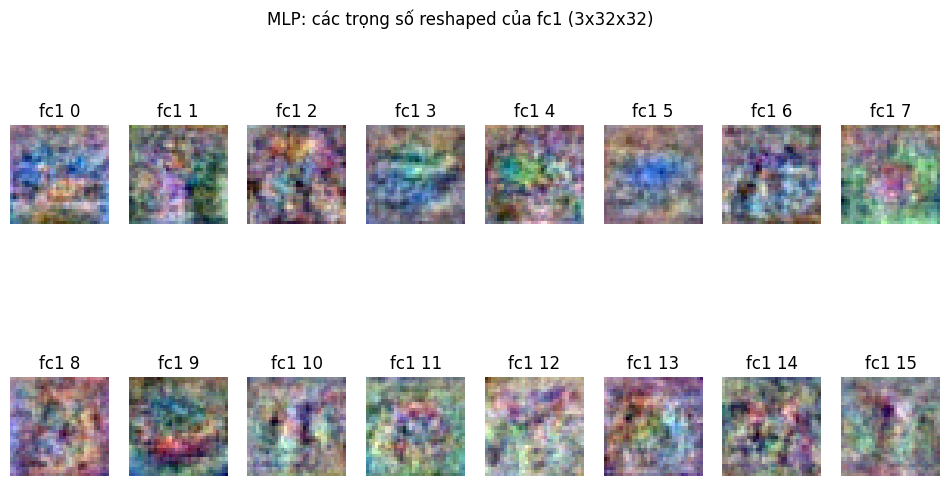

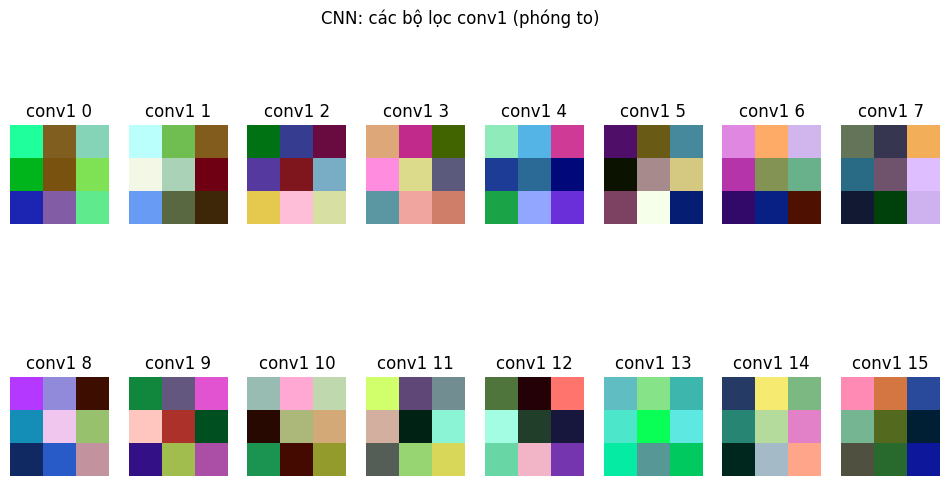

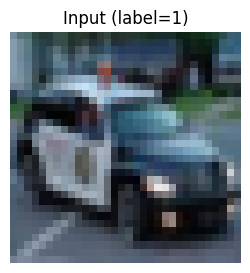

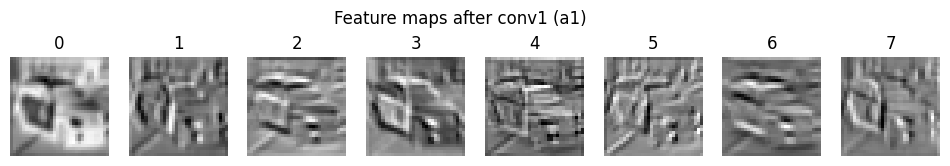

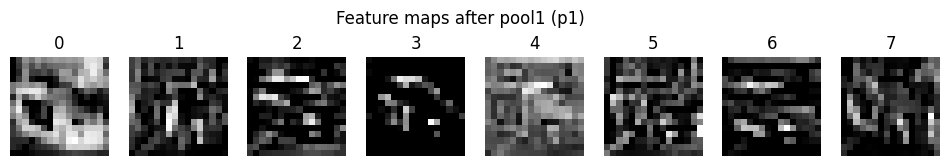

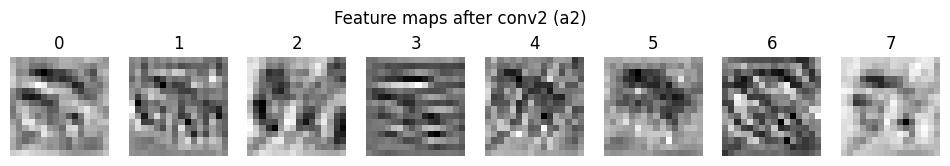

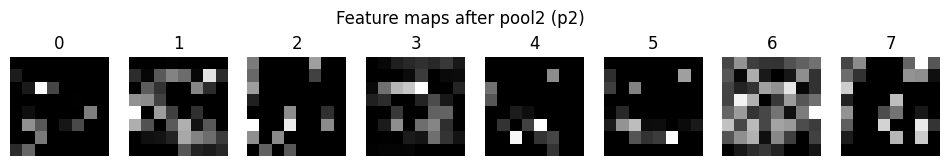

In [24]:
# 1) Tạo một test_loader nhẹ với num_workers=0 để tránh lỗi destructor
vis_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
vis_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=vis_transform)
vis_loader = DataLoader(vis_testset, batch_size=1, shuffle=True, num_workers=0)  # num_workers=0 ✅

# 2) Vẽ trọng số lớp đầu tiên của MLP (giả sử mlp đã load và có attribute fc1)
w = mlp.fc1.weight.data.clone().cpu()  # shape (512, 3072)
n_to_show = 16
plt.figure(figsize=(12,6))
for i in range(n_to_show):
    wi = w[i].view(3,32,32)  # (C,H,W)
    wi_min, wi_max = wi.min(), wi.max()
    img = (wi - wi_min) / (wi_max - wi_min + 1e-8)
    img = img.permute(1,2,0).numpy()  # H,W,C
    plt.subplot(2,8,i+1); plt.imshow(img); plt.axis('off'); plt.title(f'fc1 {i}')
plt.suptitle("MLP: các trọng số reshaped của fc1 (3x32x32)")
plt.show()

# 3) Vẽ bộ lọc conv1 của CNN (giả sử cnn có conv1)
conv_w = cnn.conv1.weight.data.clone().cpu()  # shape (out_ch, in_ch, k, k)
n_filters = conv_w.shape[0]
n_to_show = min(16, n_filters)
plt.figure(figsize=(12,6))
for i in range(n_to_show):
    fi = conv_w[i]  # (3,k,k)
    fi_min, fi_max = fi.min(), fi.max()
    img = (fi - fi_min) / (fi_max - fi_min + 1e-8)
    img_np = np.transpose(img.numpy(), (1,2,0))  # k,k,3
    # enlarge for visibility
    img_large = np.kron(img_np, np.ones((8,8,1)))
    plt.subplot(2,8,i+1); plt.imshow(img_large); plt.axis('off'); plt.title(f'conv1 {i}')
plt.suptitle("CNN: các bộ lọc conv1 (phóng to)")
plt.show()

# 4) Thu activations bằng forward hooks (không cần sửa forward của model)
activations = {}
def get_hook(name):
    def hook(module, input, output):
        activations[name] = output.detach().cpu()  # store on CPU
    return hook

# Gắn hook vào các layer cần quan sát — điều chỉnh tên layer nếu model khác
# Thông dụng: conv1 -> pool1 -> conv2 -> pool2
hooks = []
for name, module in cnn.named_modules():
    if name == "conv1":
        hooks.append(module.register_forward_hook(get_hook("a1")))
    if name == "pool1":
        hooks.append(module.register_forward_hook(get_hook("p1")))
    if name == "conv2":
        hooks.append(module.register_forward_hook(get_hook("a2")))
    if name == "pool2":
        hooks.append(module.register_forward_hook(get_hook("p2")))

# 5) Lấy 1 sample và forward qua model để thu activation
sample = None
for img, label in vis_loader:
    sample = img.to(device)  # (1,3,32,32)
    sample_label = label.item()
    break

with torch.no_grad():
    out = cnn(sample)  # forward as usual; hooks will have populated activations

# Unregister hooks (cleanup)
for h in hooks:
    h.remove()

# 6) Hiển thị ảnh gốc (inverse normalize) — dùng x*0.5 + 0.5
img_orig = sample[0].cpu() * 0.5 + 0.5  # back to [0,1]
orig_pil = to_pil(img_orig)
plt.figure(figsize=(3,3)); plt.imshow(orig_pil); plt.title(f"Input (label={sample_label})"); plt.axis('off'); plt.show()

# 7) Hàm vẽ feature maps (show đầu tiên N maps)
def plot_feature_maps_from_tensor(tensor, title, n=8):
    # tensor: (B,C,H,W) on CPU
    if tensor is None:
        print(f"No activation for {title}")
        return
    fmap = tensor[0]  # take batch=0
    C = fmap.shape[0]
    n_show = min(n, C)
    plt.figure(figsize=(n_show*1.5,2))
    for i in range(n_show):
        m = fmap[i]
        m_min, m_max = m.min(), m.max()
        m_img = (m - m_min) / (m_max - m_min + 1e-8)
        plt.subplot(1, n_show, i+1)
        plt.imshow(m_img.numpy(), cmap='gray'); plt.axis('off'); plt.title(str(i))
    plt.suptitle(title)
    plt.show()

# 8) Vẽ các feature maps thu được
plot_feature_maps_from_tensor(activations.get("a1"), "Feature maps after conv1 (a1)", n=8)
plot_feature_maps_from_tensor(activations.get("p1"), "Feature maps after pool1 (p1)", n=8)
plot_feature_maps_from_tensor(activations.get("a2"), "Feature maps after conv2 (a2)", n=8)
plot_feature_maps_from_tensor(activations.get("p2"), "Feature maps after pool2 (p2)", n=8)